In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('KaggleAZ/archive/A_Z Handwritten Data.csv')

In [3]:
df.head()
# zeroth column is the label

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [8]:
X = X.astype('float32')
y = y.astype('float32')

In [9]:
28*28

784

In [10]:
print(X.shape)
print(y.shape)


(372450, 784)
(372450,)


In [11]:
X = X.values
y = y.values
X = X.reshape(X.shape[0],28,28,1)
X/=255

In [12]:
input_shape = (28,28,1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D

In [16]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(26,activation=tf.nn.softmax))

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
7799/7799 [==============================] - 85s 11ms/step - loss: 0.2519 - accuracy: 0.9278
Epoch 2/10
7799/7799 [==============================] - 82s 10ms/step - loss: 0.1162 - accuracy: 0.9663
Epoch 3/10
7799/7799 [==============================] - 81s 10ms/step - loss: 0.0925 - accuracy: 0.9722
Epoch 4/10
7799/7799 [==============================] - 81s 10ms/step - loss: 0.0783 - accuracy: 0.9765
Epoch 5/10
7799/7799 [==============================] - 82s 10ms/step - loss: 0.0691 - accuracy: 0.9787
Epoch 6/10
7799/7799 [==============================] - 82s 10ms/step - loss: 0.0623 - accuracy: 0.9804
Epoch 7/10
7799/7799 [==============================] - 82s 10ms/step - loss: 0.0576 - accuracy: 0.9818
Epoch 8/10
7799/7799 [==============================] - 81s 10ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 9/10
7799/7799 [==============================] - 83s 11ms/step - loss: 0.0506 - accuracy: 0.9842
Epoch 10/10
7799/7799 [==============================] - 82s 11m

In [18]:
model.evaluate(X_test, y_test)

3841/3841 [==============================] - 13s 3ms/step - loss: 0.0549 - accuracy: 0.9863


[0.05487028881907463, 0.9863069653511047]

In [22]:
input_map = dict()
c = 'a'
for i in range(26):
    input_map[i] = c
    c = chr(ord(c)+1)

Predicted Letter c
Correct Label  c


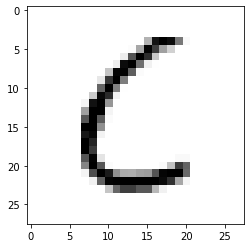

In [23]:
image_index = 2
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Letter",input_map[pred.argmax()])
print("Correct Label ",input_map[y_test[image_index]])

Predicted Letter p
Correct Label  p


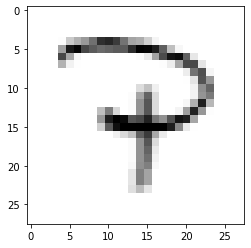

In [24]:
image_index = 20000
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Letter",input_map[pred.argmax()])
print("Correct Label ",input_map[y_test[image_index]])

Predicted Letter a
Correct Label  a


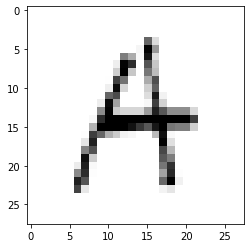

In [25]:
image_index = 89898
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Letter",input_map[pred.argmax()])
print("Correct Label ",input_map[y_test[image_index]])

Predicted Letter s
Correct Label  s


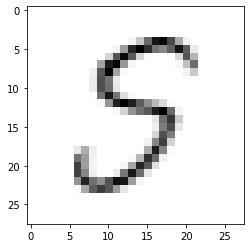

In [26]:
image_index = 1898
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Letter",input_map[pred.argmax()])
print("Correct Label ",input_map[y_test[image_index]])

In [27]:
model.save('charRecognization.h5')

In [28]:
#Model 2
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu' ,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(26,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=X_train,y=y_train, epochs=15)


Epoch 1/15
7799/7799 [==============================] - 97s 12ms/step - loss: 0.1470 - accuracy: 0.9579
Epoch 2/15
7799/7799 [==============================] - 96s 12ms/step - loss: 0.0581 - accuracy: 0.9837
Epoch 3/15
7799/7799 [==============================] - 93s 12ms/step - loss: 0.0402 - accuracy: 0.9881
Epoch 4/15
7799/7799 [==============================] - 94s 12ms/step - loss: 0.0306 - accuracy: 0.9905
Epoch 5/15
7799/7799 [==============================] - 96s 12ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 6/15
7799/7799 [==============================] - 95s 12ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 7/15
7799/7799 [==============================] - 95s 12ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 8/15
7799/7799 [==============================] - 95s 12ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 9/15
7799/7799 [==============================] - 94s 12ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 10/15
7799/7799 [==============================] - 94s 12m

In [29]:
model.evaluate(X_test, y_test)
model.save('charRecognization2.h5')

3841/3841 [==============================] - 14s 4ms/step - loss: 0.0548 - accuracy: 0.9920
